<a href="https://colab.research.google.com/github/Ovizero01/Machine-Leaning/blob/main/019_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [ ]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [ ]:
# TODO: Load regression dataset
# loading dataset
df = pd.read_csv('insurance.csv')

# printing shape
print("Shape:", df.shape)

# printing column names
print("Columns:", df.columns)

# identifying the target variable
print(df.head())
target = "charges"

Shape: (1338, 7)
Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


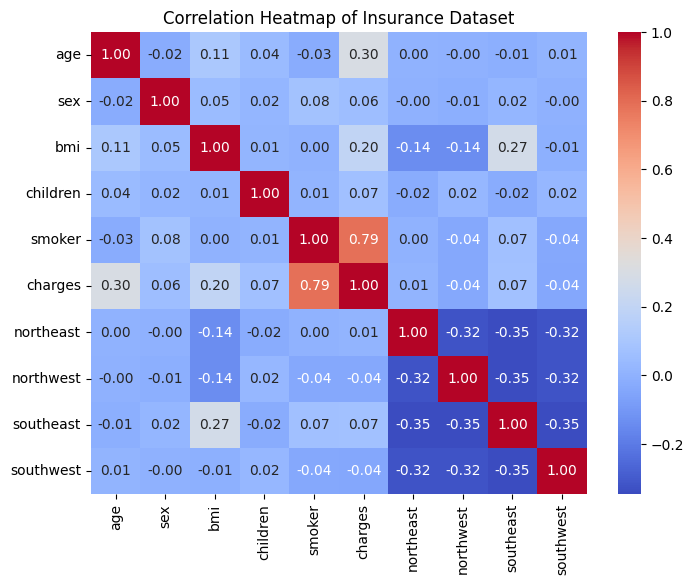

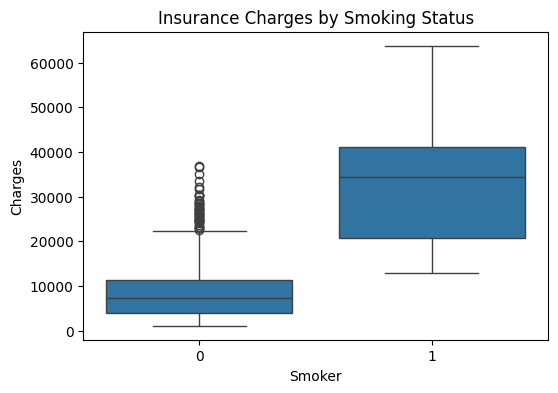

In [ ]:
# TODO: Perform EDA
# showing descriptive statistics
df.describe().T

# encoding categorical variables
order = {"male": 1, "female": 0}
df["sex"] = df["sex"].map(order).astype(int)

order = {"yes": 1, "no": 0}
df["smoker"] = df["smoker"].map(order).astype(int)

d_region = pd.get_dummies(df["region"], dtype = int)
df = pd.concat([df,d_region], axis = 1)
df.drop(columns=["region"], inplace=True)

# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Insurance Dataset")
plt.show()

# ploting smoker class vs feature target
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [ ]:
# TODO: Prepare features
# doing train-test split
X = df.drop(columns=["charges"])
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

num_cols = ["age", "bmi", "children"]

# doing standard scaling
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Multiple Linear Regression
# training the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# evaluating the model
y_pred = lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 5796.2846592762735
MAE: 4181.194473753649
R²: 0.7835929767120723


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [ ]:
# TODO: Polynomial Regression
# applying polynomial features
model = Pipeline([
      ('poly', PolynomialFeatures(degree=2, include_bias=False)),
      ('lin_reg', LinearRegression())
])

model.fit(X_train, y_train)

y_train_pred_deg = model.predict(X_train)
y_test_pred_deg = model.predict(X_test)

y_pred_poly = model.predict(X_test)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# comparing with linear regresion
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression (deg=2)"],
    "RMSE": [rmse, rmse_poly],
    "MAE": [mae, mae_poly],
    "R²": [r2, r2_poly]
})

comparison_df

,Model,RMSE,MAE,R²
0,Linear Regression,5796.284659,4181.194474,0.783593
1,Polynomial Regression (deg=2),4551.132385,2729.500134,0.866583


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [ ]:
# TODO: Support Vector Regression
# training svr with rbf kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# evaluating performance
y_pred_svr = svr_model.predict(X_test)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("RMSE:", rmse_svr)
print("MAE:", mae_svr)
print("R²:", r2_svr)

RMSE: 12898.04991550338
MAE: 8608.61574888596
R²: -0.07156876596851292


# Justifying kernel choice
Using RBF kernel because of its non-linear relationship. It maps data to infinite dimensional space, offering flexibility for any nonlinear pattern. It is best for nonlinear data with unknown structure; adapts to most patterns.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [ ]:
# TODO: Random Forest Regressor
# training random forest
rf_baseline = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_baseline.fit(X_train, y_train)

# evaluating the model
y_pred_rf = rf_baseline.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R²:", r2_rf)

RMSE: 4592.069986509748
MAE: 2551.3606989662017
R²: 0.8641721155568924


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

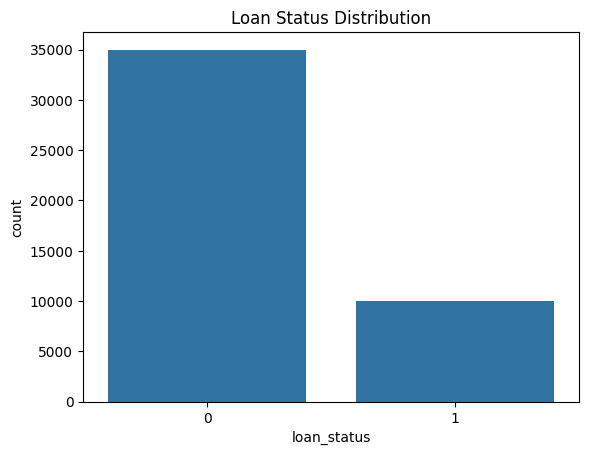

In [ ]:
# TODO: Load classification dataset
# loading dataset
df = pd.read_csv("loan_data.csv")
print(df.head())

# class distribution
class_counts = df['loan_status'].value_counts()
print(class_counts)

# visualizing class imbalance
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()

# comment on imbalance
A large number of entries belongs to one class and significantly fewer to the other. This class imbalance can bias models toward predicting one specific class. Evaluation metrics like accuracy can be misleading.

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


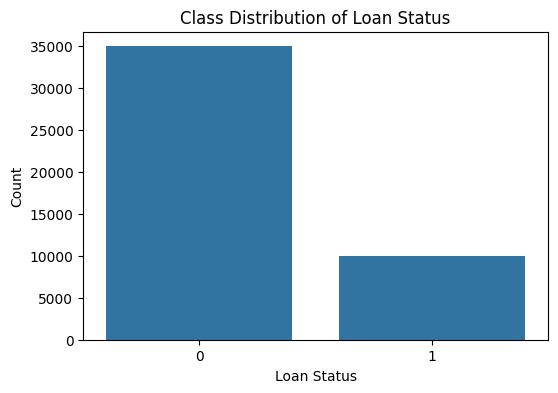

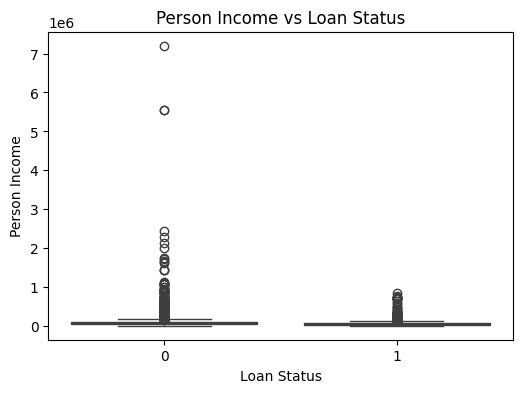

In [ ]:
# TODO: Classification EDA
# plotting class counts
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title("Class Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# plotting person income vs loan status
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title("Person Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Person Income")
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [ ]:
# TODO: Prepare classification features
# applying encoding
X = df.drop('loan_status', axis=1)
y = df['loan_status']
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('person_gender')
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)
X_encoded['person_gender'] = X_encoded['person_gender'].map({'male': 1, 'female': 0})

# applying train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# applying standardscaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


Accuracy : 0.8998
Precision: 0.7896
Recall   : 0.7485


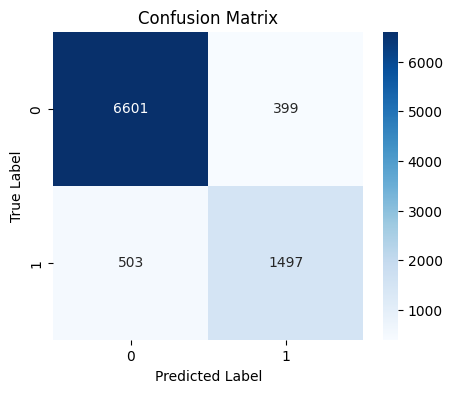

In [ ]:
# TODO: Logistic Regression
# training logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

# evaluating accuracy, precision, recall
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

# showing confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [ ]:
# TODO: SVM Classification
# training rbf svm
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# evaluating
y_pred_svm = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

Accuracy : 0.9160
Precision: 0.8494
Recall   : 0.7560


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [ ]:
# TODO: Naive Bayes
# training gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

Accuracy : 0.7530
Precision: 0.4731
Recall   : 0.9805


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


Best K: 29 with Accuracy: 0.9009


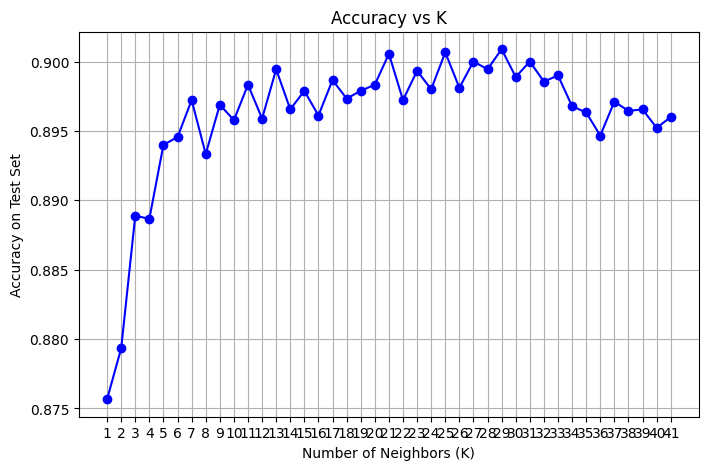

In [ ]:
# TODO: KNN
# trying multiple K values
k_values = range(1,42)
accs = []

for k in k_values:
  model = Pipeline([
      ("scaler", StandardScaler()),
      ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accs.append(accuracy_score(y_test, pred))
  best_k = k_values[accs.index(max(accs))]
print(f"Best K: {best_k} with Accuracy: {max(accs):.4f}")

# plotting accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accs, marker='o', color='blue')
plt.xticks(k_values)
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy on Test Set")
plt.title("Accuracy vs K")
plt.grid(True)
plt.show()

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [ ]:
# TODO: Random Forest Classifier
# training model
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

y_pred_rf = rf_baseline.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

# showing feature importance
print("\nFeature Importance:")
feature_importance = pd.Series(
    rf_baseline.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(feature_importance.head(10))

Accuracy : 0.9291
Precision: 0.8964
Recall   : 0.7700

Feature Importance:
previous_loan_defaults_on_file_Yes    0.227000
loan_int_rate                         0.155025
loan_percent_income                   0.152609
person_income                         0.129889
loan_amnt                             0.062712
credit_score                          0.055194
person_home_ownership_RENT            0.053720
person_age                            0.031301
person_emp_exp                        0.028637
cb_person_cred_hist_length            0.026282
dtype: float64


# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here
# Best regression model:
The Random Forest Regressor performed best among all tested models. It achieved the lowest RMSE and MAE and the highest R². This is because Random Forest can capture complex non-linear relationships and feature interactions.
# Best classification model:
Random Forest achieved strong performance while handling class imbalance and non-linear relationships effectively. It does not require feature scaling, is robust to noise, and provides feature importance. Compared to linear models Logistic Regression and KNN, it generalizes better on this dataset with mixed numeric and categorical features.
# Real-world deployment scenario:
A Random Forest regression model can be deployed by health insurance companies to estimate individual medical insurance. By inputting customer attributes, the model can generate accurate cost predictions, helping insurers design fair pricing strategies, assess financial risk, and offer personalized insurance plans.